In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

The pourpose of this notebook is to demonstrate EDA and two classification models on the well-knonwn iris flower dataset.

# Load Data and Train-Test Split

First, let's load the data:

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

number of samples in the dataset:

In [3]:
len(y)

150

number of classes and number of samples for each class:

In [4]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

There are 3 classes which are distributed equally: 50 samples for each class.

EDA and model fitting should be done only on training data. Even though the dataset is very small I will keep on with this important practice using train-test split of 80-20. Since the data is equally distributed among classes I can use simple split without stratified sampling:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
len(y_train)

120

In [7]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([39, 37, 44], dtype=int64))

As expected I got 120 samples on the training set and the data is still (more or less) equally distributed. From now on I will use only the training set and the test set will be used only to evaluate the performance of the classification models

# EDA

for the EDA part it will be convenient to wrap the data with pandas dataframe:

In [8]:
df = pd.DataFrame(X_train,columns=iris.feature_names)
df['target']=y_train
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,6.4,3.1,5.5,1.8,2
1,5.4,3.0,4.5,1.5,1
2,5.2,3.5,1.5,0.2,0
3,6.1,3.0,4.9,1.8,2
4,6.4,2.8,5.6,2.2,2


We can see that there are four features, which are different characteristics of the flower, all of them are measure in cm of different parts of the flower. The task is to classify the species (from 3 available ones) based on those features.

Just for convenience I add the names of the different species:

In [9]:
df['target_name']=df.target.map(dict(zip([0,1,2],iris.target_names)))

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,6.4,3.1,5.5,1.8,2,virginica
1,5.4,3.0,4.5,1.5,1,versicolor
2,5.2,3.5,1.5,0.2,0,setosa
3,6.1,3.0,4.9,1.8,2,virginica
4,6.4,2.8,5.6,2.2,2,virginica


Basic statistics on the data:

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,5.880833,3.053333,3.815833,1.231667,1.041667
std,0.850437,0.431907,1.784904,0.775354,0.834103
min,4.300000,2.000000,1.100000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.500000,3.300000,5.200000,1.900000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


All the features are numerical and there are no missing values. let's validate it:

In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

## Features Distributions

Let's plot the distributions of the features:

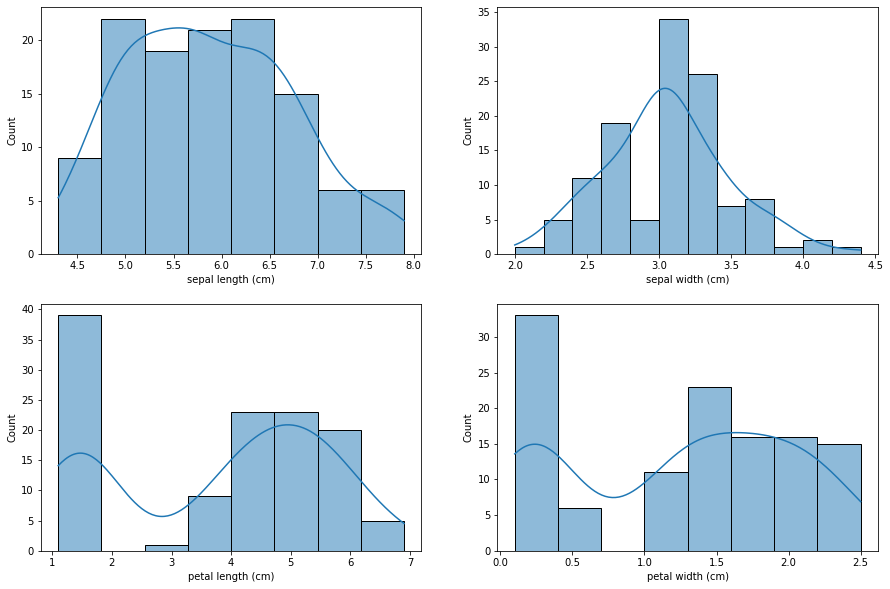

In [13]:
plt.figure(figsize=(15,10))

for i, feature in enumerate(iris.feature_names):
    ax = plt.subplot(2,2,i+1)
    ax = sns.histplot(data=df, x=feature, kde=True, ax= ax)

Some initial insights:
1. sepal length and sepal width has somewhat normal distribution while petal length and petal width have bi-modal distribution which suggest potential class segregation ability only by using those features.
2. There are no outliers.
3. All the features are on the same scale so if I will use distance-based classification algorithms (like logisitc regression or KNN) it won't be necessary to standaraize or normalize the samples.

To better understand the relationship between the features and the target let's plot the conditional distribution of each feature, ${p(X_i|y)}$:

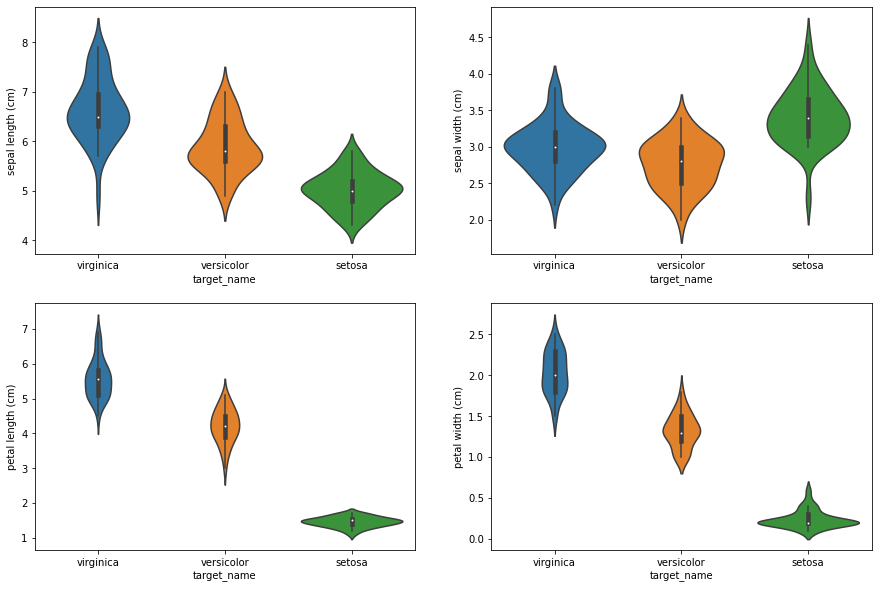

In [14]:
plt.figure(figsize=(15,10))

for i, feature in enumerate(iris.feature_names):
    ax = plt.subplot(2,2,i+1)
    ax = sns.violinplot(x="target_name", y=feature, data=df, ax=ax)

We can see that except sepal width all the features have non-overlaaped distributions for each class, which suggests that we have quite easy classification task. Also, as I guessed above the left, we can see that the left mode in the distributions of petal length and width belongs only to the setosa species.

Even though we see that the 1-D distributions are quite enough for descent classification it is interesting to see relationship between each feature pair w.r.t the target. For these purpose I will use the scatter matrix tool in pandas:

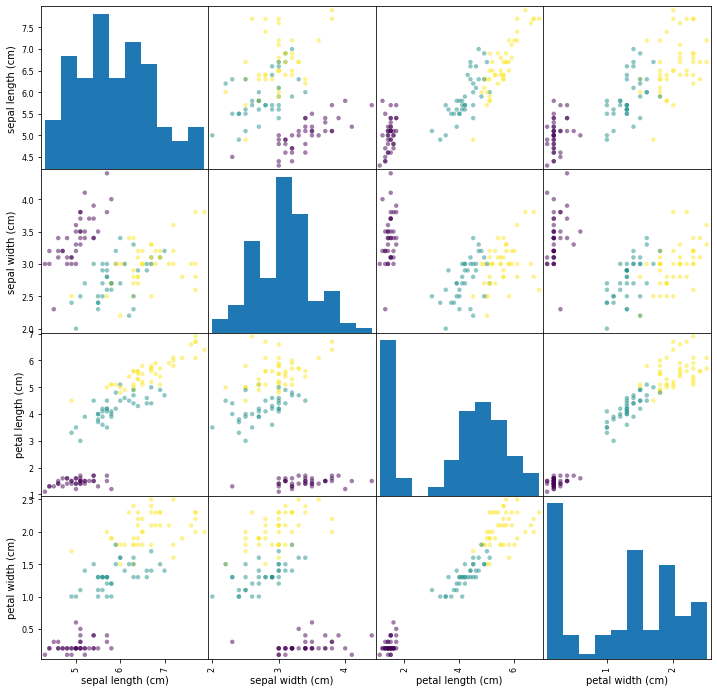

In [15]:
scatter= pd.plotting.scatter_matrix(df.drop(['target','target_name'], axis=1), c=df.target, figsize=(12,12), s=80)

This plot gives us more insights:
1. There is high correlation between petal length to petal width. However, as we see above, each of them alone is excelent feature for the classification task.
2. Except from the sepal length-sepal width scatter plot all the other plots show good segragation ability between classes even only by using linear boudries.

# Classification

Since the data is balanced we can use accuracy as the metric to evaluate the performance of the following models. First, lets try logistic regression since we saw above that the feature space can be divided with linear boundries.

### Logistic regression

In [16]:
# solver= liblinear as the docs suggests for small dataset
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
print('Accuracy of logistic regression on training set: {:.2f}'
     .format(lr.score(X_train, y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(lr.score(X_test, y_test)))

Accuracy of logistic regression on training set: 0.93
Accuracy of logistic regression on test set: 0.97


As expected we get good results using simple logistic regression. The test set score is even higher than the train score as may occur in very small dataset as in our case.

It is interesting to understnad where are the errors. For this we can use the confusion matrix:

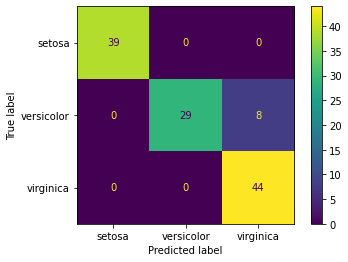

In [17]:
predictions = lr.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=iris.target_names)
disp.plot()

We can see that everything is perfect except mislabel veriscolor as virginica, in accordance with the distribution plots above where we saw that these species are closer to each other while setosa has distinct characteristics.

### KNN

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of KNN on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN on training set: 0.95
Accuracy of KNN on test set: 0.97


We can see that KNN classifier with the default parameters gives the same high performance as logistic regression. Let's plot the confusion matrix:

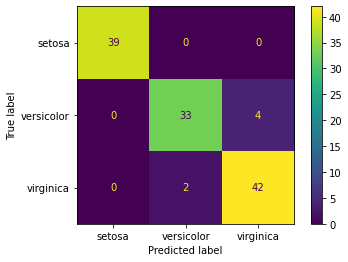

In [19]:
predictions = knn.predict(X_train)
cm = confusion_matrix(y_train, predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=iris.target_names)
disp.plot()

More or less the same observation as in logistic regression except that in KNN the mislableing is in both direction between virginica and versicolor.

### Extra evaluations

It is intereting to see how can the model learn only from one feature. Let's choose petal width who show good level of separation across classes:

In [20]:
# solver= liblinear as the docs suggests for small dataset
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train[:,-1].reshape(-1, 1), y_train)
print('Accuracy of logistic regression on training set: {:.2f}'
     .format(lr.score(X_train[:,-1].reshape(-1, 1), y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(lr.score(X_test[:,-1].reshape(-1, 1), y_test)))

Accuracy of logistic regression on training set: 0.78
Accuracy of logistic regression on test set: 0.70


The result is significantly lower. and if we add petal length:

In [21]:
# solver= liblinear as the docs suggests for small dataset
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train[:,-2:], y_train)
print('Accuracy of logistic regression on training set: {:.2f}'
     .format(lr.score(X_train[:,-2:], y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(lr.score(X_test[:,-2:], y_test)))

Accuracy of logistic regression on training set: 0.82
Accuracy of logistic regression on test set: 0.70


The results didn't improve at all. Quite reasonable because those two feature are highly correlated.

If we choose sepal length:

In [22]:
# solver= liblinear as the docs suggests for small dataset
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train[:,0].reshape(-1, 1), y_train)
print('Accuracy of logistic regression on training set: {:.2f}'
     .format(lr.score(X_train[:,0].reshape(-1, 1), y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(lr.score(X_test[:,0].reshape(-1, 1), y_test)))

Accuracy of logistic regression on training set: 0.65
Accuracy of logistic regression on test set: 0.53


The result is even worse. The above observation demonstrate the importance of all the feature together in contributing to the high classification accuracy.